# ELM - Regularização

Este exercicio mostra uma ELM com e sem regularização, avaliando o impacto do parâmetro λ sobre a superfície de separação aprendida pela rede.


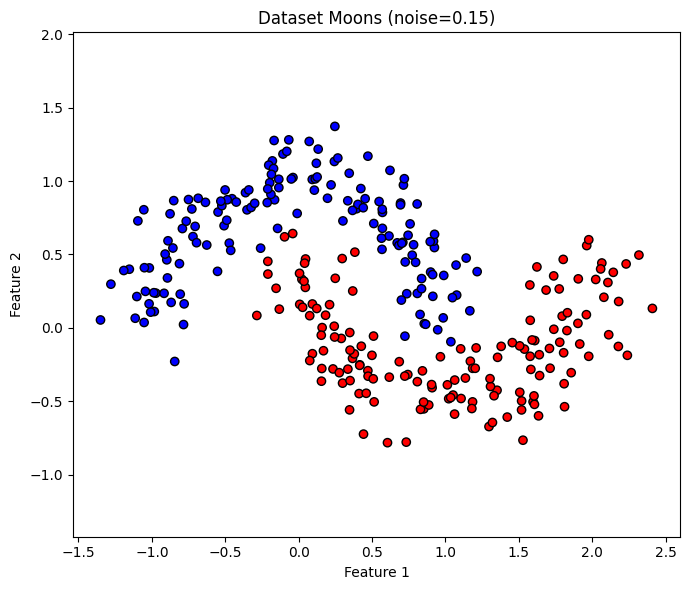

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def elm(X, y, num_hidden=20, lambda_reg=0.0):
    n_samples, n_features = X.shape
    W = np.random.randn(n_features, num_hidden)
    b = np.random.randn(1, num_hidden)
    H = sigmoid(X @ W + b)

    if lambda_reg == 0:
        beta = np.linalg.pinv(H) @ y
    else:
        I = np.eye(num_hidden)
        beta = np.linalg.inv(H.T @ H + lambda_reg * I) @ H.T @ y

    return W, b, beta

def predict(X, W, b, beta):
    H = sigmoid(X @ W + b)
    return H @ beta


X, y = make_moons(n_samples=300, noise=0.15, random_state=42)
y = y.reshape(-1, 1)  
plt.figure(figsize=(7, 6)) # Ajustar tamanho para um único plot

# Usar scatter plot com o mesmo estilo dos exemplos anteriores
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k') 

# Adicionar títulos e labels
plt.title('Dataset Moons (noise=0.15)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Opcional: manter a proporção dos eixos
plt.axis('equal') 

plt.tight_layout() # Ajustar layout
plt.show()

Importamos um dataset sintético. Vamos treinar dois modelos: um com regularização e outro sem.

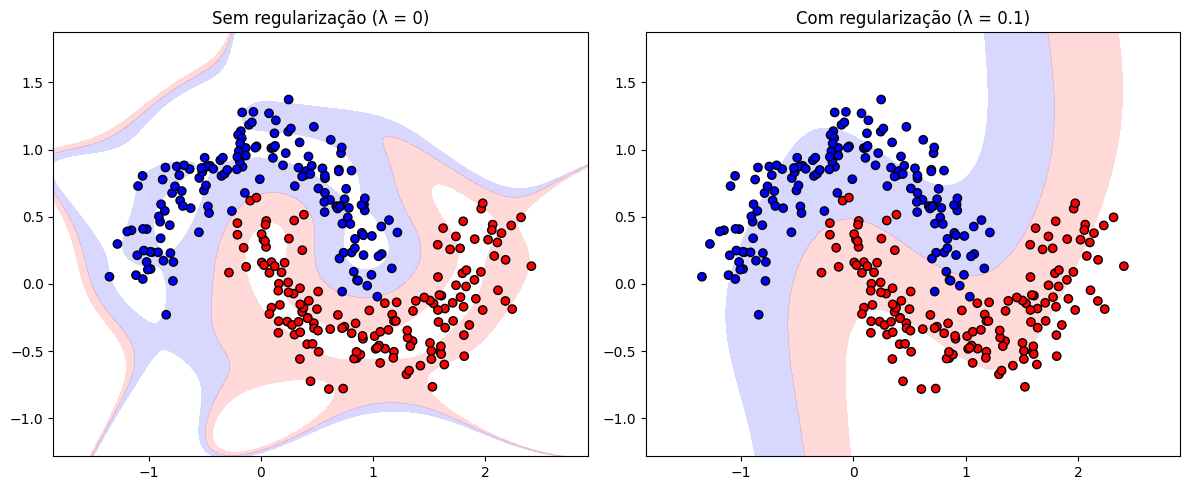

In [21]:
# Treina ELM sem e com regularização
W1, b1, beta1 = elm(X, y, num_hidden=50, lambda_reg=0)
W2, b2, beta2 = elm(X, y, num_hidden=50, lambda_reg=0.1)

# Gera malha para visualizar
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = predict(grid, W1, b1, beta1).reshape(xx.shape)
Z2 = predict(grid, W2, b2, beta2).reshape(xx.shape)

# Plota
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z1, levels=[0, 0.5, 1], cmap='bwr', alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap='bwr', edgecolors='k')
plt.title('Sem regularização (λ = 0)')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z2, levels=[0, 0.5, 1], cmap='bwr', alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap='bwr', edgecolors='k')
plt.title('Com regularização (λ = 0.1)')

plt.tight_layout()
plt.show()

Sem regularização, a ELM gera uma superfície de separação muito complexa, com formas irregulares que indicam overfitting. O modelo tenta se ajustar perfeitamente aos dados, inclusive ao ruído.

Com regularização, a superfície se torna mais suave. O modelo com λ = 0.1 não tenta acertar todos os pontos, mas busca uma separação mais geral entre as classes. Isso melhora a capacidade de generalização.

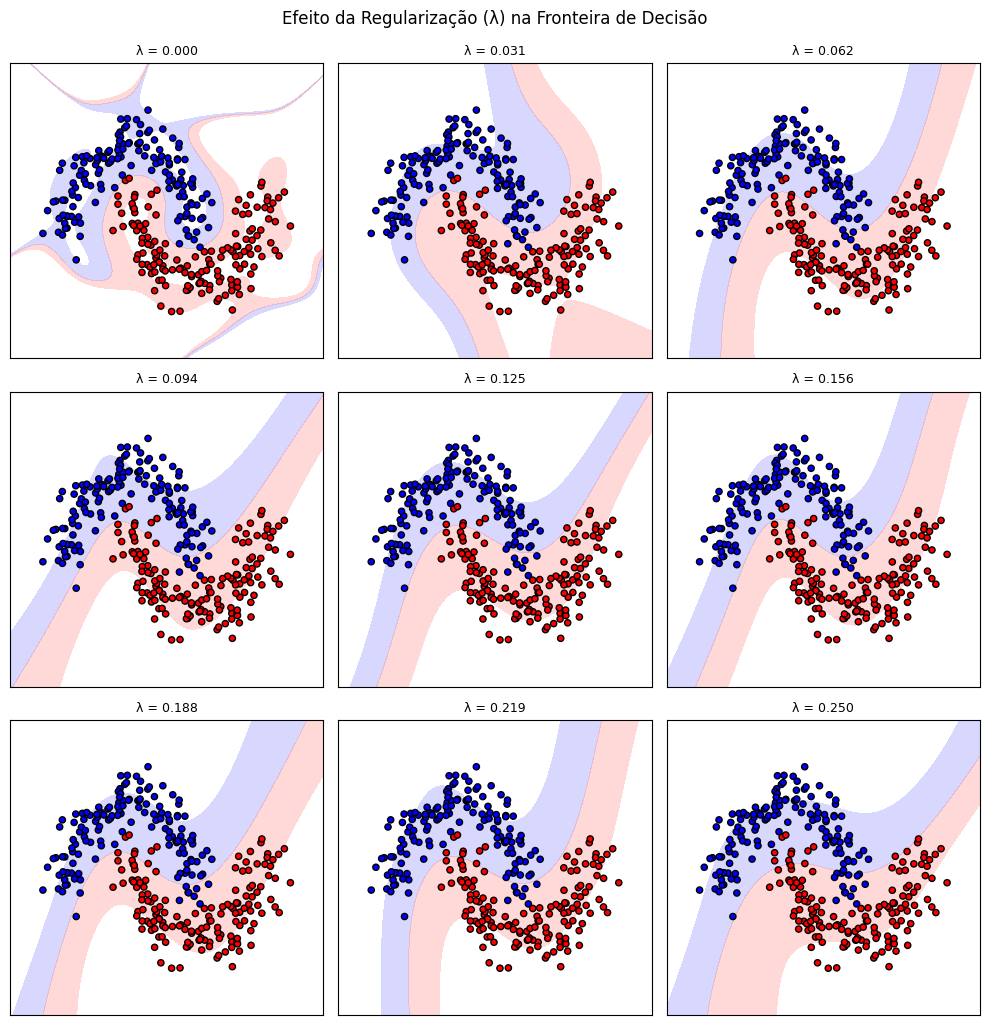

In [19]:
lambdas = np.linspace(start=0, stop=0.25, num=9)

# Criar figura 3x3
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()  # Facilitar iteração

# Para cada valor de lambda
for i, lambda_reg in enumerate(lambdas):
    # Treinar ELM
    W, b, beta = elm(X, y, num_hidden=50, lambda_reg=lambda_reg)
    
    # Fazer predição na malha
    Z = predict(grid, W, b, beta).reshape(xx.shape)
    
    # Plotar
    axes[i].contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='bwr', alpha=0.3)
    axes[i].scatter(X[:,0], X[:,1], c=y.ravel(), cmap='bwr', 
                   edgecolors='k', s=20)  # s=20 para pontos menores
    axes[i].set_title(f'λ = {lambda_reg:.3f}', fontsize=9)
    
    # Remover ticks para um visual mais limpo
    axes[i].set_xticks([])
    axes[i].set_yticks([])

# Ajustar layout
plt.tight_layout()
plt.suptitle('Efeito da Regularização (λ) na Fronteira de Decisão', 
             y=1.02, fontsize=12)

# Salvar com alta resolução
# plt.savefig('regularization_effect.pdf', dpi=300, bbox_inches='tight')
plt.show()

Acima podemos ver que ao aumentar λ a separação das classes fica mais suave.